In [18]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from pylab import rcParams

In [4]:
with open('data/events/events_Germany.json') as f:
    data = json.load(f)

In [7]:
data_df = pd.DataFrame(data)
data_df.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739,Pass,2446,1H,2.409746,85,179896442
1,8,Simple pass,[{'id': 1801}],14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739,Pass,2446,1H,2.506082,85,179896443
2,8,Simple pass,[{'id': 1801}],14803,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",2516739,Pass,2446,1H,6.946706,85,179896444
3,8,Simple pass,[{'id': 1801}],14768,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",2516739,Pass,2446,1H,10.786491,85,179896445
4,8,Simple pass,[{'id': 1801}],14803,"[{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]",2516739,Pass,2446,1H,12.684514,85,179896446


In [10]:
# Identify the goals and add them to a column

shots = data_df[data_df['subEventName'].isin(['Shot','Free kick shot','Penalty'])]

In [12]:
shots = shots.assign(Goal=0)
for i,shot in shots.iterrows():
    for shottags in shot['tags']:
            #Tags contain that it's a goal
            if shottags['id']==101:
                shots.at[i,'Goal']=1
sum(shots['Goal'])

833

In [13]:
match_list = shots['matchId'].unique().tolist()
match_list

[2516739,
 2516740,
 2516741,
 2516742,
 2516743,
 2516744,
 2516745,
 2516746,
 2516747,
 2516748,
 2516749,
 2516750,
 2516751,
 2516752,
 2516753,
 2516754,
 2516755,
 2516756,
 2516757,
 2516758,
 2516759,
 2516760,
 2516761,
 2516762,
 2516763,
 2516764,
 2516765,
 2516766,
 2516767,
 2516768,
 2516769,
 2516770,
 2516771,
 2516772,
 2516773,
 2516774,
 2516775,
 2516776,
 2516777,
 2516778,
 2516779,
 2516780,
 2516781,
 2516782,
 2516783,
 2516784,
 2516785,
 2516786,
 2516787,
 2516788,
 2516789,
 2516790,
 2516791,
 2516792,
 2516793,
 2516794,
 2516795,
 2516796,
 2516797,
 2516798,
 2516799,
 2516800,
 2516801,
 2516802,
 2516803,
 2516804,
 2516805,
 2516806,
 2516807,
 2516808,
 2516809,
 2516810,
 2516811,
 2516812,
 2516813,
 2516814,
 2516815,
 2516816,
 2516817,
 2516818,
 2516819,
 2516820,
 2516821,
 2516822,
 2516823,
 2516824,
 2516825,
 2516826,
 2516827,
 2516828,
 2516829,
 2516830,
 2516831,
 2516832,
 2516833,
 2516834,
 2516835,
 2516836,
 2516837,
 2516838,


In [14]:
# fetch number of shots and goals in each of the matches

num_matches = len(match_list)
shots_in_match = []
goals_in_match = []

for match in match_list:
    shots_in_match.append(len(shots[shots['matchId']==match]))
    goals_in_match.append(len(shots[np.logical_and(shots['matchId']==match, (shots['Goal']==1))]))

In [22]:
# Make histogram of goals

mean_goals = np.mean(goals_in_match)
goals_dist,goals_bins = np.histogram(goals_in_match, bins = np.arange(-0.5,10.5))
goals_dist = goals_dist/num_matches

In [24]:
print(mean_goals)
print(goals_bins)
print(goals_dist)

2.7222222222222223
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5]
[0.07843137 0.14052288 0.27777778 0.20915033 0.15686275 0.0751634
 0.04575163 0.00980392 0.00653595 0.        ]


In [46]:
# Make Poisson distribution

g = np.arange(0,10)
Poisson_g = np.zeros(10)
for i,k in enumerate(g):
    Poisson_g[i] = np.power(mean_goals,k)*np.exp(-mean_goals)/np.math.factorial(k)

In [29]:
print(g)
print(Poisson_g)

[0 1 2 3 4 5 6 7 8 9]
[0.06572853 0.17892766 0.24354043 0.22099039 0.15039624 0.0818824
 0.03715035 0.01444736 0.00491611 0.00148697]


In [47]:
g-0.5

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5])

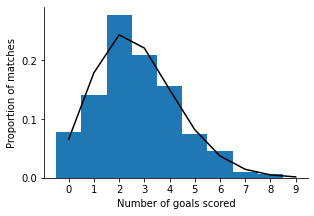

In [30]:
# set up figure
fig = plt.figure()
rcParams['figure.figsize'] = 12/2.54, 8/2.54
ax = fig.add_subplot(1,1,1)

#Plot data
plt.hist(g-0.5,9, weights=goals_dist)
plt.plot(g, Poisson_g, color='black')
ax.set_yticks(np.arange(0,0.3,0.1)) 
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_position('zero')    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(0,10,1))
ax.set_ylabel('Proportion of matches')
ax.set_xlabel('Number of goals scored')
plt.show()    

In [31]:
fig.savefig('output/PoissonDistributionGoals.pdf' , dpi=None, bbox_inches="tight")

In [ ]:
Exercise:
#1 Make a histogram of shots per game
#2 Find the mean and standard deviation for shots per game 
#3 Show that shots per game is roughtly normally distributed.

In [39]:
max(shots_in_match)

39

In [ ]:
# Make histogram of shots

mean_shots = np.mean(shots_in_match)
shots_dist,shots_bins = np.histogram(shots_in_match, bins = np.arange(5,40))
shots_dist = shots_dist/num_matches

In [43]:
print(mean_shots)
print(shots_bins)
print(shots_dist)

23.823529411764707
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00326797
 0.00980392 0.00980392 0.00980392 0.0130719  0.02941176 0.02941176
 0.05555556 0.04901961 0.04575163 0.08169935 0.09803922 0.07843137
 0.06862745 0.09150327 0.05882353 0.04901961 0.04248366 0.03267974
 0.02287582 0.01633987 0.02614379 0.0130719  0.02287582 0.0130719
 0.00653595 0.01633987 0.00653595]


In [54]:
shots_dist.shape

(39,)

In [57]:
((g-1)).shape

(40,)

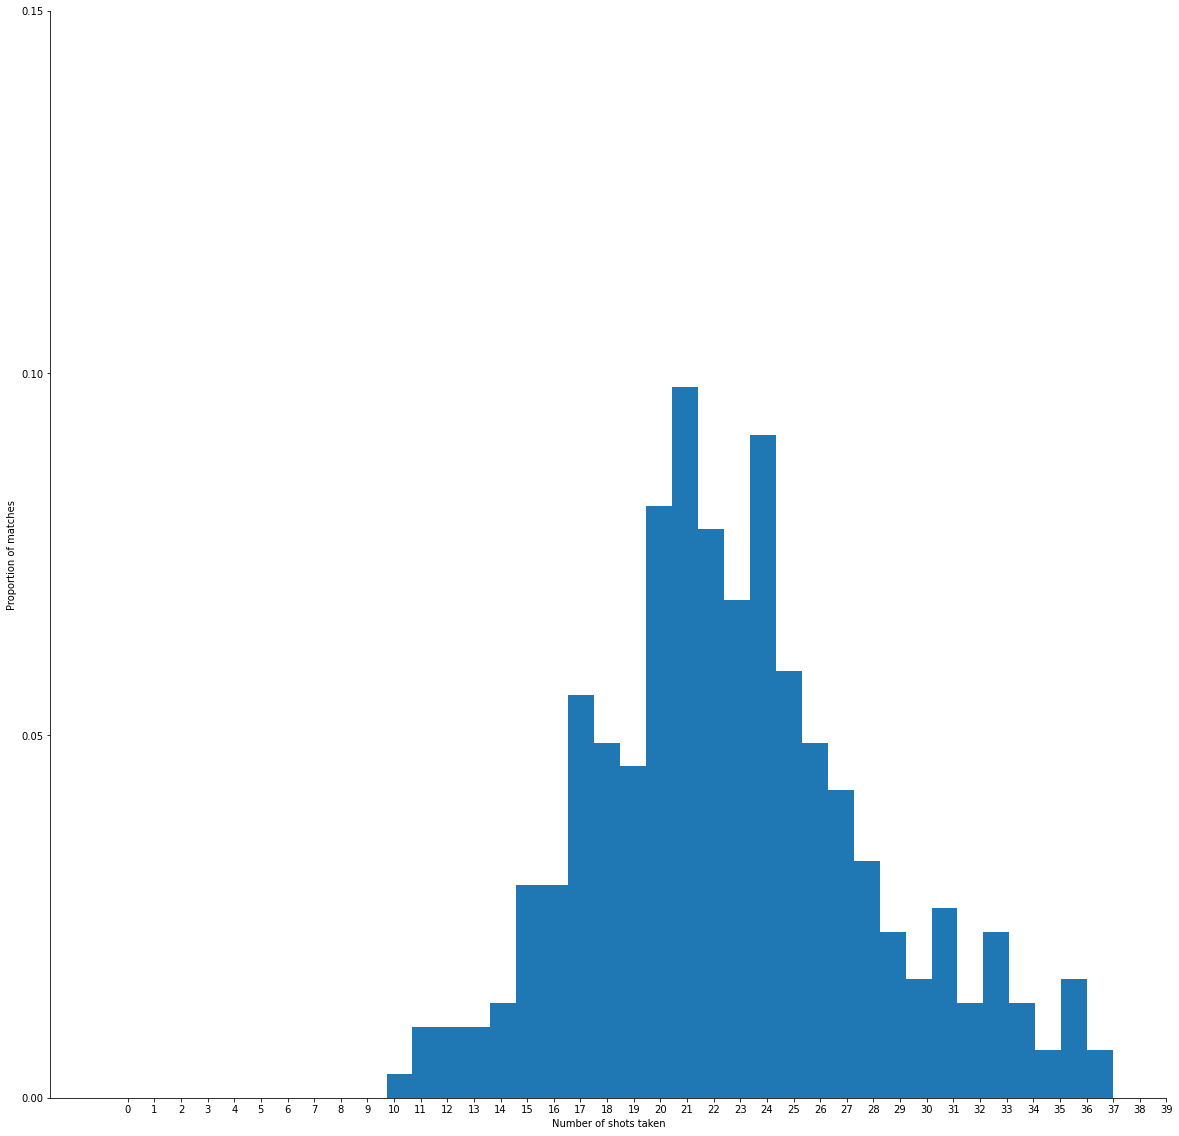

In [63]:
# set up figure
fig = plt.figure()
rcParams['figure.figsize'] = 17, 17

ax = fig.add_subplot(1,1,1)

#Plot data
g = np.arange(0,39)
plt.hist(g-1,39, weights=shots_dist)
# plt.plot(g,Poisson_g, color='black')
ax.set_yticks(np.arange(0,0.2,0.05)) 
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_position('zero')    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(0,40,1))
ax.set_ylabel('Proportion of matches')
ax.set_xlabel('Number of shots taken')
plt.show()    